In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

#Kaggle dataset used: 

Parsing the json file generated after running the model, and storing it in dataframe format

In [2]:
with open('C:\\Users\\uditg\\Downloads\\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.yelp.json') as f:
    data = json.load(f)


df = pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
for i in data:
        if len(i['aspect']) > 0:
            df = df.append({'sentence': i['sentence'], 'aspect': i['aspect'], 'confidence': i['confidence'], 'sentiment':i['sentiment']}, ignore_index=True)

In [3]:
df.head()

,sentence,aspect,sentiment,confidence
0,love the gyro plate . Rice is so good and I al...,"[gyro plate, Rice, candy selection]","[Positive, Positive, Positive]","[0.9959, 0.9959, 0.9959]"
1,"Luckily , I didn ' t have to travel far to mak...","[employees, flight]","[Positive, Positive]","[0.9402, 0.9418]"
2,Nobuo shows his unique talents with everything...,"[menu, features, pork belly buns, stout]","[Positive, Positive, Positive, Positive]","[0.9941, 0.9941, 0.9948, 0.9942]"
3,The oldish man who owns the store is as sweet ...,"[man, sandwiches]","[Positive, Positive]","[0.9766, 0.9744]"
4,Wonderful Vietnamese sandwich shoppe . Their b...,"[sandwich, baguettes, baked, egg rolls]","[Positive, Positive, Positive, Positive]","[0.8605, 0.8951, 0.849, 0.8738]"


Converting all the aspects to lowercase format to remove any duplicate aspects that might be present because of mismatch in casing

In [4]:
#Convert all aspects within list to lowercase
df['aspect'] = df['aspect'].apply(lambda x: [item.lower() for item in x])

# EDA:

For the EDA purpose, the aim is to analyze the polarity of the aspects based on the frequency of their occurences, and try to derive meaningful insights from them.

Word Cloud Representation

In [5]:
#Create word cloud for the aspects
def createWordCloud(df, numberOfValues, title, aspect):
    # create a word cloud for the aspects
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df.head(numberOfValues)[aspect]))
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

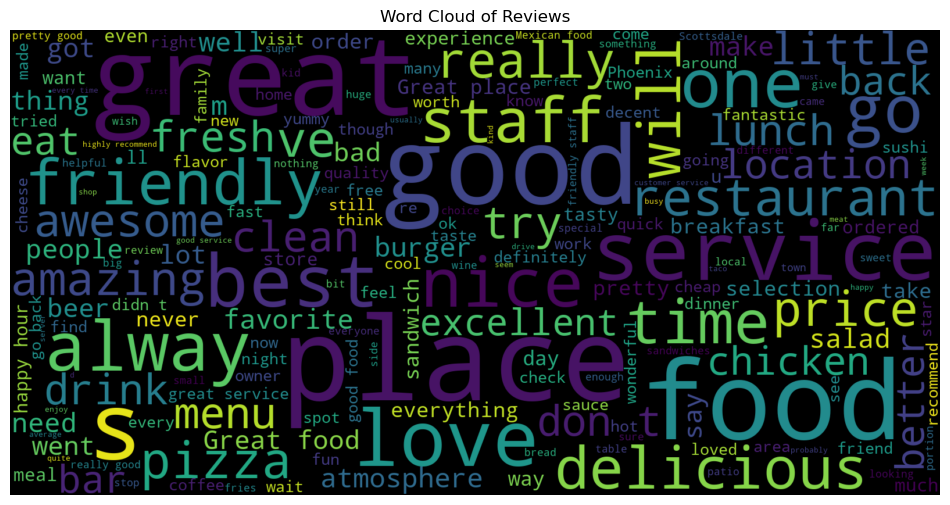

In [6]:
createWordCloud(df, len(df), "Word Cloud of Reviews", 'sentence')

Generating a pie chart based on the value of the aspect supplied. The pie chart shows the distrribtion of the polarities associated with the supplied aspect.

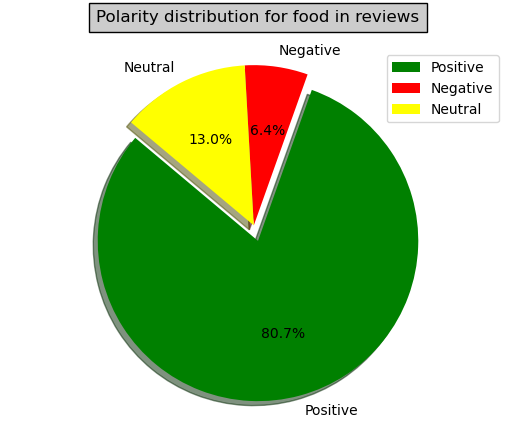

In [51]:
#find reviews having staff as aspect

# ind=[]
# for i in range(len(df['aspect'])):
#     if 'food' in df['aspect'][i]:
#         ind.append(i)

def generatePie(aspect, general):
    pos=0
    neg=0
    neu=0
    for i, j in zip(df['aspect'], df['sentiment']):
        if general:
            for k in i:
                if aspect in k:
                    index=i.index(k)
                    if j[index]=='Positive':
                        pos+=1
                    elif j[index]=='Negative':
                        neg+=1
                    else:
                        neu+=1
        else:
            if aspect in i:
                #get the index of the staff
                index=i.index(aspect)
                if j[index]=='Positive':
                    pos+=1
                elif j[index]=='Negative':
                    neg+=1
                else:
                    neu+=1

    #plot graph for pos, neg, neu pie chart

    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [pos, neg, neu]
    colors = ['Green', 'Red', 'Yellow']
    explode = (0.1, 0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.title('Polarity distribution for '+aspect+' in reviews', bbox={'facecolor':'0.8', 'pad':5}, y=1.05)
    plt.legend(labels, loc="best")
    
    plt.axis('equal')
    plt.show()

generatePie('food', False)

Identifying the unique aspects from the dataframe, and storing it within a frequency map to obtaing the frequently occuring aspects within the reviews

In [8]:
#identify the unique aspects
unique_aspects=[]
for i in df['aspect']:
    for j in i:
        if j not in unique_aspects:
            unique_aspects.append(j)

print(unique_aspects)

['gyro plate', 'rice', 'candy selection', 'employees', 'flight', 'menu', 'features', 'pork belly buns', 'stout', 'man', 'sandwiches', 'sandwich', 'baguettes', 'baked', 'egg rolls', 'place', 'food', 'garlic', 'wine', 'burgers', 'wings', 'atmosphere', 'beer selection', 'cocktails', 'pizza', 'miso soup', 'floor plans', 'staff', 'mexican food', 'chicken', 'device', 'environment', 'islands', 'ice cream', 'service', 'lux', 'coffee', 'pastries', 'music', 'takeout', 'quesadillas', 'wait staff', 'meal', 'trout', 'waitress', 'biscuits', 'gravy', 'soup', 'delivery', 'people', 'stacked enchiladas', 'chips', 'salsa', 'interior', 'prices', 'kung', 'portions', 'beer', 'subs', 'chef', 'pizza bianco', 'wait', 'deserts', 'bar', 'drafts', 'sushi', 'fish', 'spicy tuna', 'cooked food', 'appetizers', 'entrees', 'drinks', 'aiello', 's', 'scallops venezia', 'veal', 'both', 'bread', 'guys', 'folks', 'patio', 'restaurant', 'post office', 'happy hour', 'hot chocolate', 'bartender', 'breakfast', 'facial', 'filibe

In [9]:
def uniqueASpectCount(aspect):
    pos=0
    neg=0
    neu=0
    for i, j in zip(df['aspect'], df['sentiment']):
        if aspect in i:
            #get the index of the staff
            index=i.index(aspect)
            if j[index]=='Positive':
                pos+=1
            elif j[index]=='Negative':
                neg+=1
            else:
                neu+=1

    return pos, neg, neu, pos+neg+neu

Creating data frame out of the frequency map for easier operations

In [10]:
df_unique_aspect=pd.DataFrame(columns=['aspect', 'pos', 'neg', 'neu', 'total'])
for i in unique_aspects:
    pos, neg, neu, total=uniqueASpectCount(i)
    df_unique_aspect=df_unique_aspect.append({'aspect': i, 'pos': pos, 'neg': neg, 'neu': neu, 'total': total}, ignore_index=True)

df_unique_aspect.head()

,aspect,pos,neg,neu,total
0,gyro plate,1,0,0,1
1,rice,10,3,2,15
2,candy selection,1,0,0,1
3,employees,12,4,1,17
4,flight,2,0,0,2


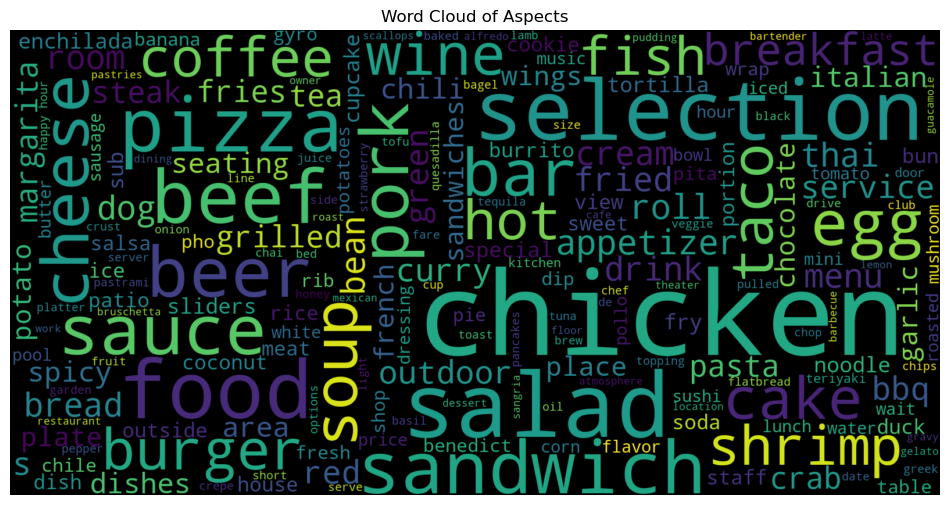

In [11]:
createWordCloud(df_unique_aspect, len(df_unique_aspect), "Word Cloud of Aspects", 'aspect')

Adding additional columns: 'pos_percentage' and 'neg_percentage' to store the ratio of the positive, and negative polarities. One thing that was observed while performing EDA was the negative/neutral feelings were lower as compared to the positive ones. So to balance it, the neutral and negative reviews have been combined (just to give an idea of the overall spread, it won't effect any of the calculations that are being done further)

In [12]:
#Creating a new column for positive and negative percentage

df_unique_aspect['pos_percent']=df_unique_aspect['pos']/df_unique_aspect['total']
df_unique_aspect['neg_percent']=(df_unique_aspect['neg']+df_unique_aspect['neu'])/df_unique_aspect['total']
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
0,gyro plate,1,0,0,1,1.0,0.0
1,rice,10,3,2,15,0.666667,0.333333
2,candy selection,1,0,0,1,1.0,0.0
3,employees,12,4,1,17,0.705882,0.294118
4,flight,2,0,0,2,1.0,0.0


Sorting the dataframe according to the pos_percent, neg_percent and total

In [13]:
df_unique_aspect=df_unique_aspect.sort_values(by=['pos_percent'], ascending=False)
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
0,gyro plate,1,0,0,1,1.0,0.0
1404,brownies,3,0,0,3,1.0,0.0
1420,toasted subs,2,0,0,2,1.0,0.0
1419,mexican fare,1,0,0,1,1.0,0.0
1418,nuts,2,0,0,2,1.0,0.0


In [14]:
df_unique_aspect=df_unique_aspect.sort_values(by=['neg_percent'], ascending=False)
df_unique_aspect.head(20)
#filet values with total greater than 30

,aspect,pos,neg,neu,total,pos_percent,neg_percent
1012,education,0,1,0,1,0.0,1.0
1738,politics,0,1,0,1,0.0,1.0
1270,young lady,0,0,1,1,0.0,1.0
1443,arrangement,0,1,0,1,0.0,1.0
1493,pollo fundido,0,1,0,1,0.0,1.0
1025,tommy,0,1,0,1,0.0,1.0
361,world,0,1,0,1,0.0,1.0
607,tako salad,0,0,1,1,0.0,1.0
362,panda,0,1,1,2,0.0,1.0
606,unagi,0,0,1,1,0.0,1.0


In [15]:
df_unique_aspect=df_unique_aspect.sort_values(by=['total'], ascending=False)
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
16,food,584,46,94,724,0.80663,0.19337
34,service,443,41,50,534,0.829588,0.170412
27,staff,220,12,14,246,0.894309,0.105691
15,place,158,14,21,193,0.818653,0.181347
21,atmosphere,126,3,7,136,0.926471,0.073529


Note:
- From the above, we notice that there are rows which have 100% positive or negative rate as certain aspects have occured only once. To nullify their effects, moving forward a filter has been put such that the total count is above a particular threshold so that such high values that are occuring only a certain number of times doesn't oversaturate the other relevant data

returnDF returns the relevant rows where a certain aspect has occured. Additionally, 'general' parameter is added such that certain general aspects could also be identified, if required. For instance, if general is set as True, then if the aspect "chicken" is passed, the function would return all the rows that have aspects like ["chicken", "chicken rice", "sour chicken"] and so on. However, if the flag is set as False, the output would only have rows that have "chicken" in their aspect.

In [16]:
#return dataframe having chicken as aspect
def returnDF(aspect, general):
    df_aspect=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if general:
            for m in j:
                if aspect in m:
                    df_aspect=df_aspect.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)
        else:
            if aspect in j:
                df_aspect=df_aspect.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_aspect

# returnDF('chicken')

Identifying the general aspects, and ordering them by frequency

In [17]:
word_count = {}
for item in unique_aspects:
    words = item.split()
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

most_common_word = max(word_count, key=word_count.get)
print(word_count)

#sort word_count dictionary
sorted_word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_word_count)

{'gyro': 3, 'plate': 6, 'rice': 7, 'candy': 1, 'selection': 30, 'employees': 1, 'flight': 1, 'menu': 11, 'features': 1, 'pork': 21, 'belly': 2, 'buns': 3, 'stout': 1, 'man': 2, 'sandwiches': 8, 'sandwich': 25, 'baguettes': 1, 'baked': 4, 'egg': 12, 'rolls': 10, 'place': 7, 'food': 29, 'garlic': 8, 'wine': 13, 'burgers': 2, 'wings': 8, 'atmosphere': 3, 'beer': 19, 'cocktails': 1, 'pizza': 26, 'miso': 2, 'soup': 17, 'floor': 2, 'plans': 1, 'staff': 7, 'mexican': 3, 'chicken': 71, 'device': 1, 'environment': 1, 'islands': 1, 'ice': 7, 'cream': 11, 'service': 10, 'lux': 1, 'coffee': 14, 'pastries': 3, 'music': 5, 'takeout': 1, 'quesadillas': 2, 'wait': 4, 'meal': 1, 'trout': 1, 'waitress': 2, 'biscuits': 1, 'gravy': 3, 'delivery': 2, 'people': 2, 'stacked': 1, 'enchiladas': 4, 'chips': 4, 'salsa': 6, 'interior': 2, 'prices': 3, 'kung': 2, 'portions': 3, 'subs': 3, 'chef': 3, 'bianco': 2, 'deserts': 1, 'bar': 19, 'drafts': 1, 'sushi': 5, 'fish': 13, 'spicy': 9, 'tuna': 7, 'cooked': 2, 'appe

From the above, it's visible that dishes which haeve chicken, salad, pork are some of the most popular ones.

In [18]:
print(len(sorted_word_count))
print(len(unique_aspects))

1824
2200


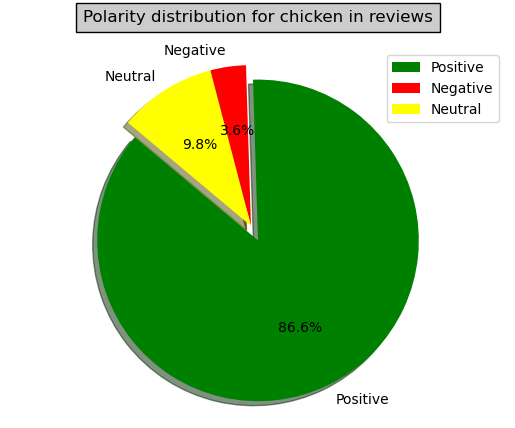

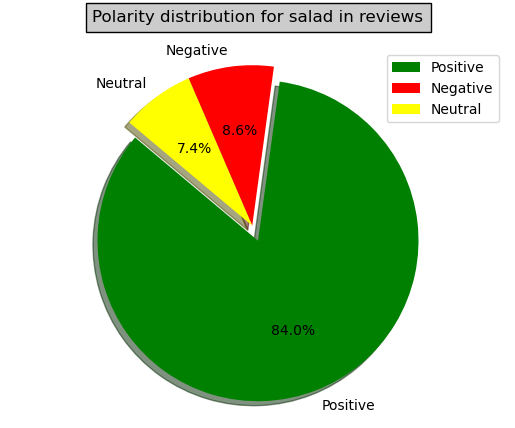

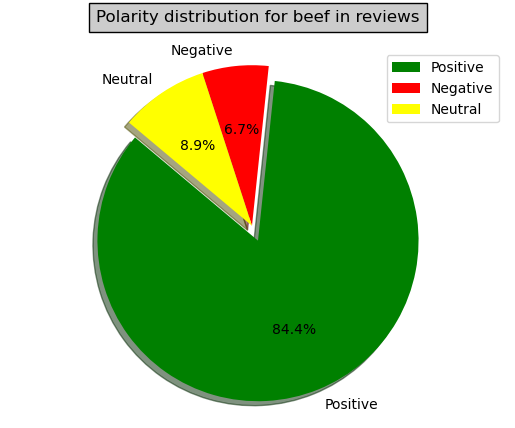

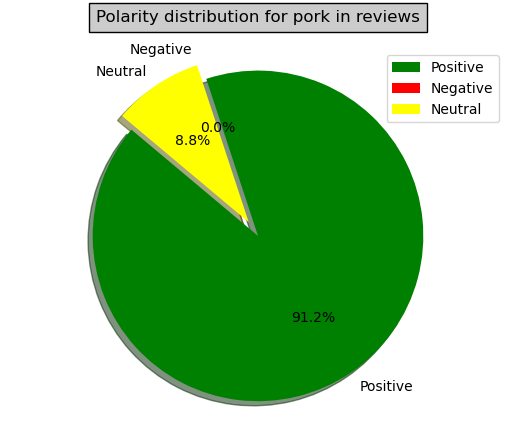

In [60]:
#Generating Pie charts for the popular dishes
for i in ['chicken', 'salad', 'beef', 'pork']:
    generatePie(i, True)

In [20]:
#returing dataframe with details related to tuna in its aspect
returnDF('tuna', True)

,sentence,aspect,sentiment,confidence
0,"Absolutely the best sushi in the valley , hand...","[sushi, fish, spicy tuna, service, cooked food]","[Positive, Positive, Positive, Positive, Posit...","[0.586, 0.586, 0.5898, 0.5883, 0.5859]"
1,"2 . 5 , just not enough to give it three . Foo...","[food, ahi tuna, hour]","[Neutral, Neutral, Neutral]","[0.8129, 0.7941, 0.8137]"
2,"Had a couple of happy hour apps here , all fla...","[bacon, ahi tuna, pork sliders, service]","[Neutral, Neutral, Neutral, Neutral]","[0.6406, 0.6224, 0.6238, 0.6419]"
3,Pretty good . Excellent deals for happy hour ....,"[vegetable tempura, miso soup, salad, beef ter...","[Positive, Positive, Positive, Positive, Posit...","[0.7257, 0.7252, 0.7001, 0.7235, 0.7225, 0.717..."
4,This place has a top notch tuna tataki app ! G...,"[tuna tataki app, rolls, service, price]","[Positive, Positive, Positive, Positive]","[0.8958, 0.8062, 0.8006, 0.7984]"
5,Terrible rolls . The Dragon was so so . The Ca...,"[rolls, dragon, california, spicy tuna, tasted]","[Negative, Negative, Negative, Negative, Negat...","[0.9477, 0.9485, 0.9495, 0.9584, 0.9483]"
6,"Ruth ' s Chris , the only steak house I can fu...","[steak, plates, sizzle, ahi tuna appetizer, ch...","[Positive, Positive, Positive, Positive, Posit...","[0.9486, 0.9476, 0.9585, 0.9735, 0.9615]"
7,I went back recently and noticed thatt the qua...,"[tuna, bread]","[Positive, Positive]","[0.3799, 0.3793]"
8,I really enjoy this place and have eaten there...,"[brew, coconut shrimp, ahi tuna salad, steak s...","[Positive, Positive, Positive, Positive, Posit...","[0.6917, 0.7031, 0.7101, 0.7089, 0.698]"
9,The tuna sandwich is fabulous ! ! ! Definitely...,[tuna sandwich],[Positive],[0.9963]


Creating stacked bar charts for the reviews. identifyLowPerformingAspects is used to identify the aspects which have extremely negative polarities i.e the sum of positive polarities is lesser than the sum of neutral and negative ones. These are areas were the restaurant is potentially struggling. As mentioned previously, a filter has been added to filter out any reviews that occur less frequently.

In [36]:
# create the stacked bar chart
def createStack(df_unique_aspect, sortOrder, numberOfValues, identifyLowPerformingAspects=False):
    if identifyLowPerformingAspects:
        df_unique_aspect=df_unique_aspect[df_unique_aspect['total']>5]
        df_unique_aspect=df_unique_aspect.sort_values(by=[sortOrder], ascending=False)
        df_unique_aspect=df_unique_aspect[df_unique_aspect['pos']<=df_unique_aspect['neg']+df_unique_aspect['neu']]
    # sort the dataframe
    else:
        df_unique_aspect=df_unique_aspect.sort_values(by=[sortOrder], ascending=False)
        df_unique_aspect=df_unique_aspect[df_unique_aspect['total']>10]
    # print(df_unique_aspect.head(numberOfValues))

    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['pos'], label='Positive')
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['neg'], label='Negative', bottom=df_unique_aspect.head(numberOfValues)['pos'])
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['neu'], label='Neutral', bottom=df_unique_aspect.head(numberOfValues)['pos']+df_unique_aspect.head(numberOfValues)['neg'])
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['total'], label='Total', bottom=0, alpha=0.1)

    # set the title and axis labels
    plt.title('Stacked Bar Chart of Reviews by Aspect')
    plt.xlabel('Aspect')
    plt.ylabel('Total Reviews')

    # add the legend
    plt.legend(loc='upper right')

    #label 45 degree
    plt.xticks(rotation=45)

    # display the plot
    plt.show()

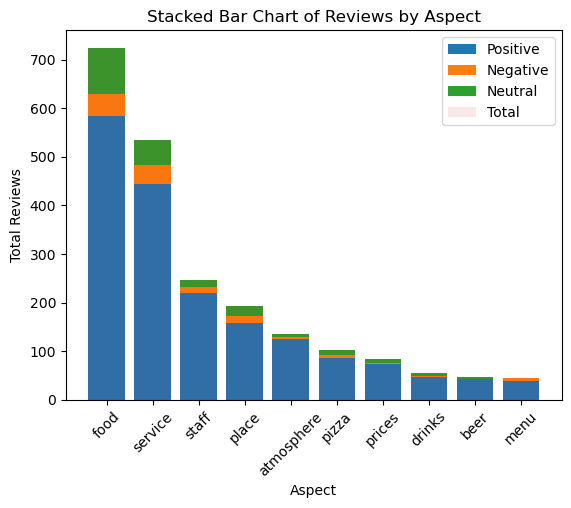

In [37]:
#Top 10 aspects with highest occurence
createStack(df_unique_aspect, 'total', 10)

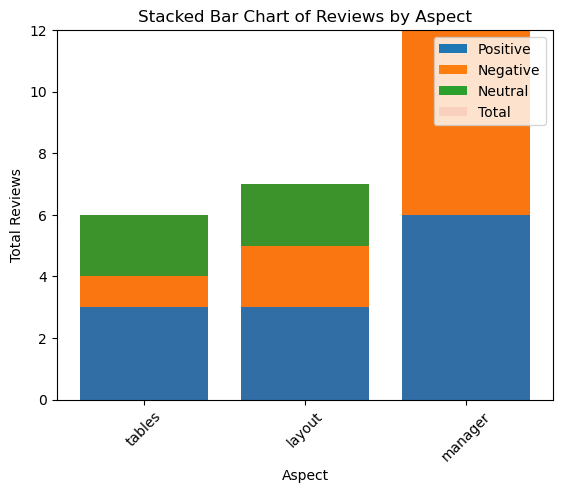

In [38]:
createStack(df_unique_aspect, 'neu', len(df_unique_aspect), True)

Overall, we can see the restaurant has quite great positive reviews in most of the aspects. However, it does suffer in terms of overall seating arrangements, and the manager could be changed as there is specific mention about him, although the overall staff has extremely positive reviews. 

# Attempts on identifying why certain aspects have low confidence rate 

Note: This is a seperate attempt, and as such could be greatly influenced by the choice of dataset. However, the attempt is to find any relatable patterns that can be attributed why certain comments have aspects that were generated, but had extremely low confidence. Initial, look suggest that the model struggles to relate statements that have extremely mixed reviews.

Visualizing Comments which have lower confidences

In [23]:
#return all the rows that have confidence lesser than 0.5. COnfidence is a list of values

def returnLowConfidence():
    df_low_confidence=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if l[0]<0.5:
            df_low_confidence=df_low_confidence.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_low_confidence

df_low_confidence=returnLowConfidence()

In [24]:
df_low_confidence.head()

,sentence,aspect,sentiment,confidence
0,Not busy at all but took nearly 45 min to get ...,"[meal, trout, waitress]","[Negative, Negative, Negative]","[0.4188, 0.4204, 0.4231]"
1,Other than the really great happy hour prices ...,"[happy hour, food, drinks, service]","[Positive, Positive, Positive, Positive]","[0.3675, 0.376, 0.3764, 0.3777]"
2,I much prefer drinking here to eating here . S...,"[', burgers, salads]","[Negative, Positive, Positive]","[0.4866, 0.4878, 0.4931]"
3,I really don ' t get why everyone is raving th...,[portions],[Negative],[0.4824]
4,These guys helped me out with my rear windshie...,[windshield],[Neutral],[0.4126]


In [25]:
for i in range(10):
    print(df_low_confidence.iloc[i]['sentence'])
    print()

Not busy at all but took nearly 45 min to get our meal . Ordered the trout and was shocked to see lots and lots of bones . Hmmmmm . Well asked the waitress about it and she said " they try the best they can " hmmmmmm isn ' t this a " fish " restaurant ? They comped the trout but still not sure I would go back .

Other than the really great happy hour prices , its hit or miss with this place . More often a miss . : ( The food is less than average , the drinks NOT strong ( at least they are inexpensive ) , but the service is truly hit or miss . I ' ll pass .

I much prefer drinking here to eating here . Sometimes it is the only place close and I decide to order food and I always regret it . I ' m a vegetarian so maybe I ' m too limited and the burgers are awesome So stick to traditional fare . The salads my daughter and I had yesterday were pathetic

I really don ' t get why everyone is raving this place . I ' ve been here twice and ordered the carne asada burrito . The portions are real

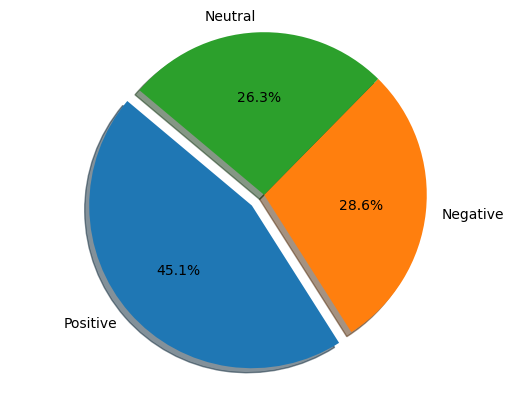

In [26]:
#calculate the frequency of positive, negative and neutral in aspects column. aspect is a list of values

def calculateFrequency(df):
    pos=0
    neg=0
    neu=0
    for i in df['sentiment']:
        for j in i:
            if j=='Positive':
                pos+=1
            elif j=='Negative':
                neg+=1
            else:
                neu+=1

    return pos, neg, neu

pos, neg, neu=calculateFrequency(df_low_confidence)

#pie chart of positive, negative and neutral
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


From the above distribution, we can see that the data is more or less evenly spread in terms of positive, and negative/neutral reviews

In [45]:
#length of sentence in df_low_confidence
def lengthOfSentence(df):
    length=[]
    for i in df['sentence']:
        length.append(len(i))
    return length

length=lengthOfSentence(df_low_confidence)
print(len(length))

114


114


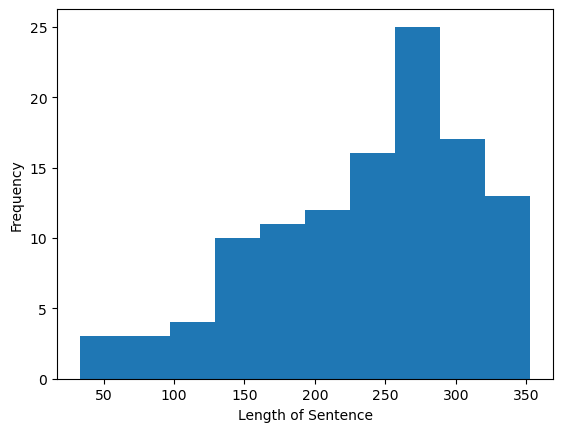

In [61]:
#Distribution of length of sentence in df smoothed

def distributionOfLength(df):
    length=[]
    for i in df['sentence']:
        length.append(len(i))
    print(len(length))
    plt.hist(length, bins=10)
    plt.xlabel('Length of Sentence')
    plt.ylabel('Frequency')
    plt.show()
    
distributionOfLength(df_low_confidence)

2607


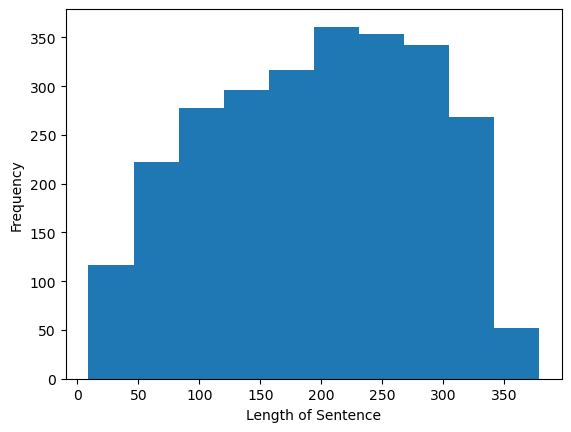

In [62]:
distributionOfLength(df)

In [63]:
#rows with confidence greater than 0.85

def returnHighConfidence():
    df_high_confidence=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if l[0]>0.85:
            df_high_confidence=df_high_confidence.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_high_confidence

df_high_confidence=returnHighConfidence()

In [64]:
df_high_confidence

,sentence,aspect,sentiment,confidence
0,love the gyro plate . Rice is so good and I al...,"[gyro plate, rice, candy selection]","[Positive, Positive, Positive]","[0.9959, 0.9959, 0.9959]"
1,"Luckily , I didn ' t have to travel far to mak...","[employees, flight]","[Positive, Positive]","[0.9402, 0.9418]"
2,Nobuo shows his unique talents with everything...,"[menu, features, pork belly buns, stout]","[Positive, Positive, Positive, Positive]","[0.9941, 0.9941, 0.9948, 0.9942]"
3,The oldish man who owns the store is as sweet ...,"[man, sandwiches]","[Positive, Positive]","[0.9766, 0.9744]"
4,Wonderful Vietnamese sandwich shoppe . Their b...,"[sandwich, baguettes, baked, egg rolls]","[Positive, Positive, Positive, Positive]","[0.8605, 0.8951, 0.849, 0.8738]"
...,...,...,...,...
1668,Standard Mexican fare - but quite delicious . ...,"[pitcher of frozen margaritas, service]","[Positive, Positive]","[0.9169, 0.806]"
1669,Highly recommend . This is my second time here...,"[arroz, shrimp, service]","[Positive, Positive, Positive]","[0.9909, 0.991, 0.9916]"
1670,Best corned beef sandwich I ' ve had anywhere ...,"[corned beef sandwich, portions of food, jewis...","[Positive, Positive, Positive, Positive]","[0.934, 0.9369, 0.9349, 0.9408]"
1671,Awesome food ! Little pricey but delicious . L...,"[food, power pancakes]","[Positive, Positive]","[0.9017, 0.8817]"


1673


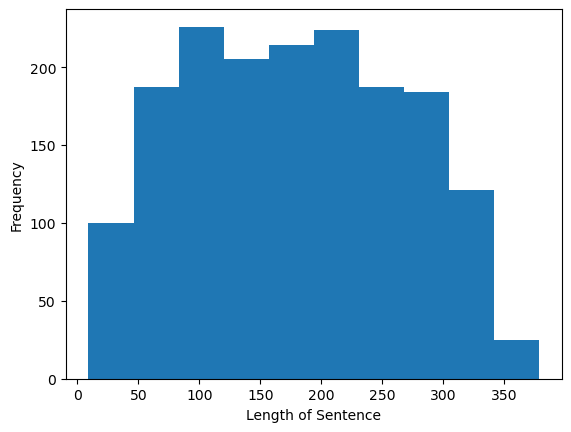

In [65]:
distributionOfLength(df_high_confidence)

From teh above graph, we see that the model is able to detect most of the aspects with high confidence, however from the distribution of the aspects based on the length of the review it seems that most of the reviews that the had low confidences had peak at around 250-300 words. However, for high confidece, the distribution is more or less evenly spread. This might suggest that the model struggles to identify aspects in longer reviews to an extend, but since these out of 2673 reviews, only 114 had low confidence, it is hard to draw any concrete conclusions. But, on a positive note the 1673 aspects that were identified had a confidence of 0.9 or above, which is a good sign.